In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
iris = datasets.load_iris()
iris_data = iris.data # 花萼 長度 花萼 寬度 花瓣長度 屬種
iris_label = iris.target

In [23]:
iris_data[0:5]

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
#由於KNN分類法是藉由確認最近的觀察值來預測分類，因此變數的比例就會影響很大。
#載入標準化比例尺（StandardScaler）套件
from sklearn.preprocessing import StandardScaler
iris_data = pd.DataFrame(iris_data)

scaler = StandardScaler()
scaler.fit(iris_data)
scaled_features = scaler.transform(iris_data)
df_feat = pd.DataFrame(scaled_features,columns=iris_data.columns)
df_feat.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [40]:
train_data , test_data , train_label , test_label = train_test_split(df_feat,iris_label,test_size=0.2) # 切資料

Text(0, 0.5, 'Error Rate')

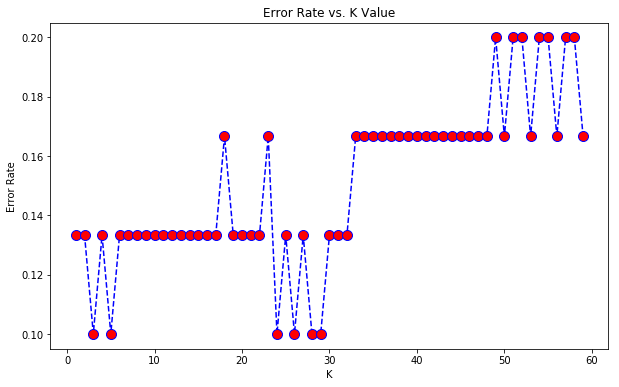

In [41]:
error_rate = []
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_data,train_label)
    pred_i = knn.predict(test_data)
    error_rate.append(np.mean(pred_i != test_label))


#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5%-6%之間震盪，
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_data,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [48]:
print(knn.ㄥ(test_data))

[0 1 0 0 2 1 1 1 2 0 2 1 1 2 2 2 0 1 1 2 0 2 0 2 2 1 1 1 2 2]


In [49]:
print(test_label)

[0 1 0 0 2 1 1 1 2 0 2 1 1 2 2 2 0 2 1 2 0 2 0 2 2 2 1 2 2 1]


In [ ]:
# 二元分類
https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/361666/

In [ ]:
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
#看表現 01
pred = knn.predict(X_test)

print('WITH K=40')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))